# Relatório de Análise VII

## Criando Agrupamentos

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

In [3]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,Apartamento


In [4]:
dados['Valor'].mean()

5134.157289002557

In [5]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [6]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
78           Flamengo
Name: Bairro, dtype: object

In [7]:
grupo_bairro = dados.groupby('Bairro')
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [8]:
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 108, 111, 113, 118, 131, 133, 137, 151, 154, 156, 166, 167, 174, 187, 190, 208, 215, 222, 225, 234, 237, 240, 245, 260, 266, 275, 277, 292, 293, 294, 296, 303, 309, 312, 326, 336, 337, 346, 361, 368, 370, 376, 382, 389, 391, 402, 414, 434, 435, 437, 438, 441, 451, 453, 464, 465, 467, 475, 478, 486, 496, 502, 505, 513, 539, 540, 541, 542, 545, 549, 554, 556, 557, 558, 586, 589, 590, 592, 596, 598, 603, 613, 624, ...], 'Botafogo': [23, 48, 87, 88, 112, 120, 128, 135, 197, 201, 226, 335, 363, 417, 418, 500, 526, 528, 547, 595, 651, 687, 721, 758, 767, 824, 829, 863, 918, 927, 931, 1009, 1047, 1084, 1095, 1114, 1120, 1131, 1144, 1169, 1206, 1210, 1228, 1255, 1287, 1300, 1309, 1322, 1353, 1389, 1420, 1425, 1461, 1523, 1535, 1585, 1636, 1661, 1676, 1705, 1747, 1748, 1794, 1820, 1829, 1832, 1860, 1929, 1938, 1965, 1980, 1989, 1997, 2037, 2074, 2077, 2089, 2091, 2092, 2096, 2105, 2156, 2157, 2173, 2187, 22

In [9]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7298.835224342444
Botafogo -> 8840.304
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Tijuca -> 2043.52


In [10]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7298.84,3577.12
Botafogo,8840.30,974.05
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Tijuca,2043.52,711.69


## Estatísticas Descritivas

In [11]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3878.0,7298.84,12846.02,800.0,2500.0,4500.0,8575.0,600000.0
Botafogo,875.0,8840.30,152031.73,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [12]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Tijuca,750.0,45000.0


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

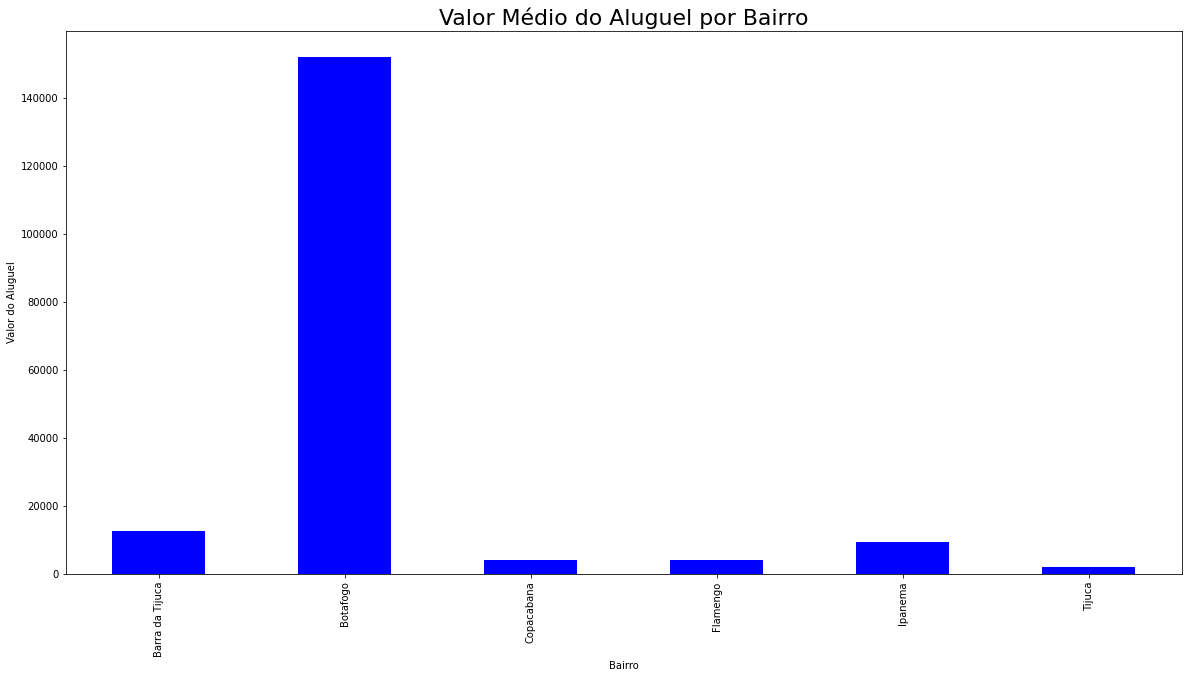

In [14]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})